<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

---
#Initializing
---

In [176]:
#importing pandas ,numpy,matplotlib.pyplot & seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [177]:
df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv', encoding = "ISO-8859-1")

In [178]:
# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(8,6)})
plt.rcParams['figure.figsize'] = [8,6]

---
# Functions
----

In [179]:
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]


In [180]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# making a function to train the model and evaluate the model

def score_metrix (model,X_test,X_train,Y_test,Y_train,graph=True,best_parameter=True,):
  '''
    train the model and gives mse,rmse,r2,adj r2 score of the model
    used only when y is transformed to sqrt 
  '''
  #training the model
  model.fit(X_train,Y_train)

  if best_parameter==True:
    try:
      # finding the best parameters of the model if any 
      print("The best parameters found out to be :" ,model.best_params_, " \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass

  #predicting the values
  Y_pred = model.predict(X_test)

  #finding mean_squared_error
  MSE  = mean_squared_error(Y_test**2,Y_pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  
  r2 = r2_score(Y_test**2,Y_pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2,'\n')

  mean_sq_error.append(MSE)
  root_mean_sq_error.append(MSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  if graph ==True:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(20,10))
    plt.plot((Y_pred)[:100])
    plt.plot((np.array(Y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()


In [181]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,Y_test,Y_train, graph=True, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #training the model    
  model.fit(X_train,Y_train)

  # finding the best parameters of the model if any 
  if best_parameter==True:
    try:
      # finding the best parameters of the model if any 
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass

  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  Y_pred = model.predict(X_test)

  #finding mean_squared_error
  MSE  = mean_squared_error(Y_test,Y_pred)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(Y_test,Y_pred)
  print("R2 :" ,r2)
  
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2,'\n')

  mean_sq_error.append(MSE)
  root_mean_sq_error.append(MSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  # ploting the line graph of first 100 actual and predicted values 
  if graph ==True:
    plt.figure(figsize=(20,10))
    plt.plot((Y_pred)[:100])
    plt.plot((np.array(Y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()

In [182]:
import torch
#creating a function to save the model in drive at a location
def save_model (model_name):
  '''
  save the model in the drive loacation
  '''
  #mounting the gdrive to colab
  from google.colab import drive
  drive.mount('/content/drive')

  model_save_name=str(model_name)+'.plt'
  path = "/content/drive/MyDrive/Colab Notebooks/capstone ml 1/models/" + str(model_name)
  torch.save(model_name, path)

In [183]:
import torch
def load_model(model_name):
  '''
  load the model from drive
  '''
  #mounting the gdrive to colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  #path to find the model
  path = "/content/drive/MyDrive/Colab Notebooks/capstone ml 1/models/"+str(model_name)
  return model_name


In [184]:
def feature_importances_graph (model):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = model.feature_importances_
  indices = np.argsort(importances)

  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


In [185]:
pip install lime

In [186]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)


---
#EDA
---

In [187]:
og_df=df.copy()

In [188]:
print ('Shape dataset')
print (df.shape)
print ('\n')
print ('Info Dataset')
print (df.info())
print ('\n')
print ('See if any missing value of Dataset')
print (df.isna().sum())

Shape dataset
(8760, 14)


Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Function

In [189]:
df.describe()

Rented Bike Count         Hour  ...  Rainfall(mm)  Snowfall (cm)
count        8760.000000  8760.000000  ...   8760.000000    8760.000000
mean          704.602055    11.500000  ...      0.148687       0.075068
std           644.997468     6.922582  ...      1.128193       0.436746
min             0.000000     0.000000  ...      0.000000       0.000000
25%           191.000000     5.750000  ...      0.000000       0.000000
50%           504.500000    11.500000  ...      0.000000       0.000000
75%          1065.250000    17.250000  ...      0.000000       0.000000
max          3556.000000    23.000000  ...     35.000000       8.800000

[8 rows x 10 columns]

In [190]:
df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [191]:
df.Seasons.value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [192]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [193]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

good news it does not have any null values

In [194]:
# create new day,month, hour info from date
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)


In [195]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

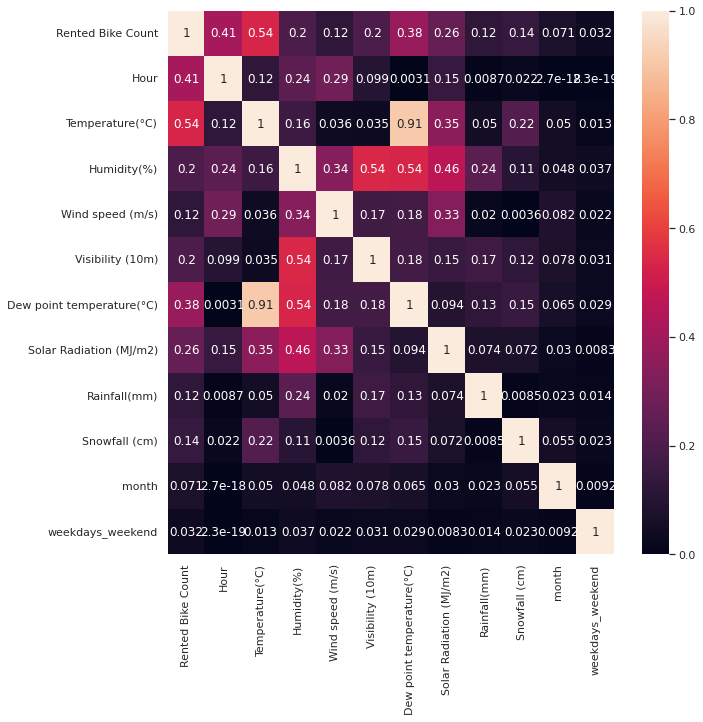

In [196]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True)


In [197]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [198]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

we can remove dew point tem as it is coorelated to temprature 

In [199]:
numeric_features=df.describe().columns

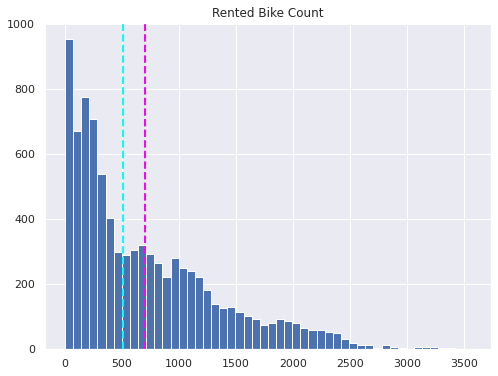

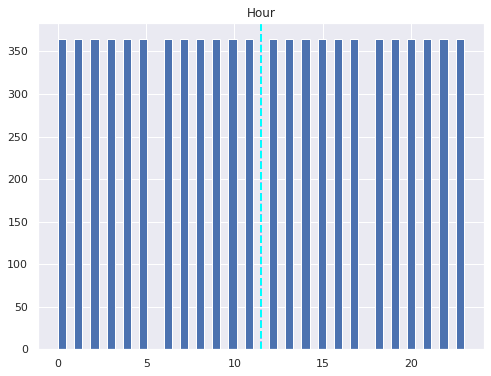

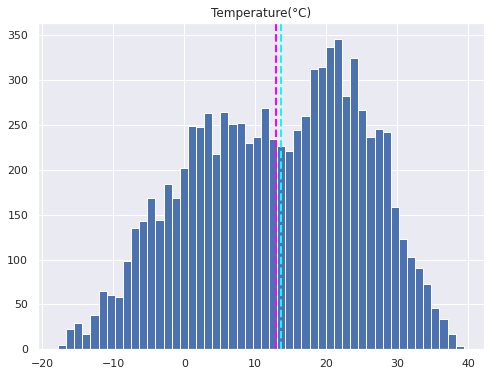

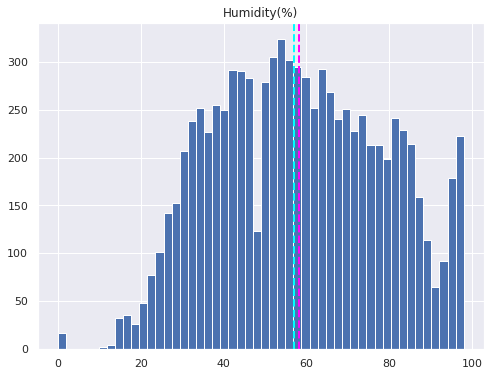

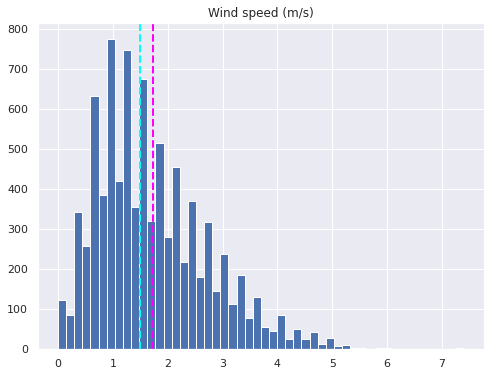

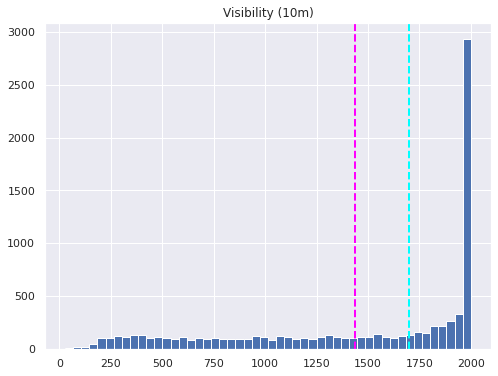

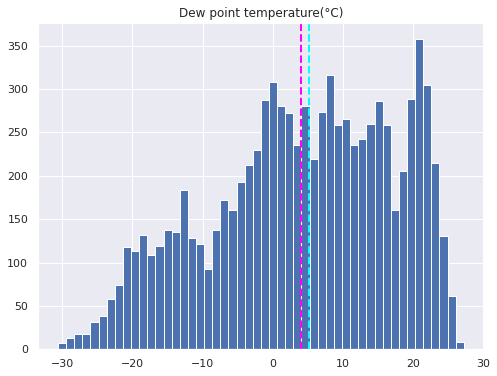

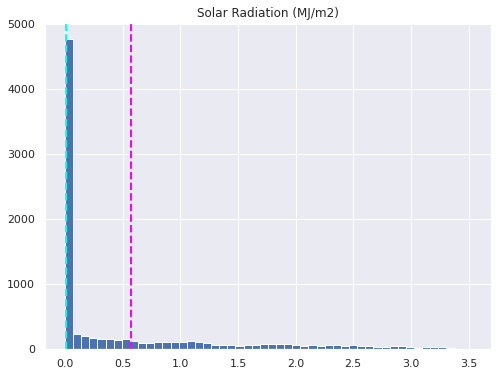

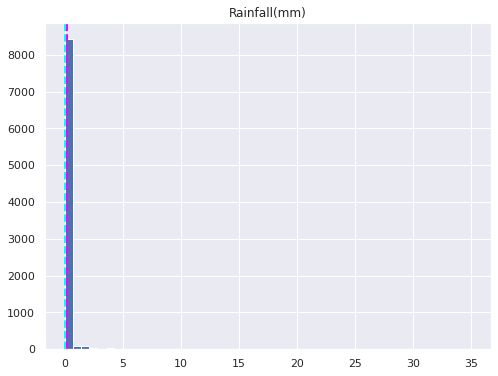

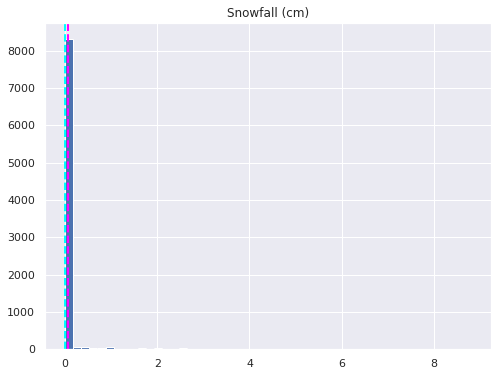

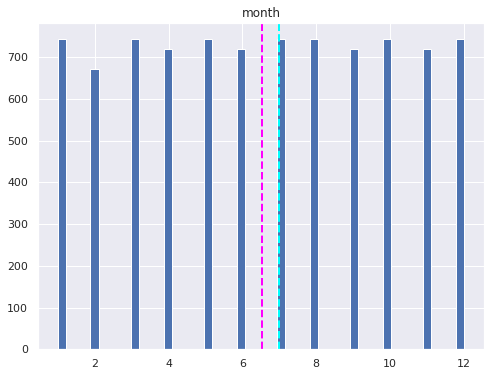

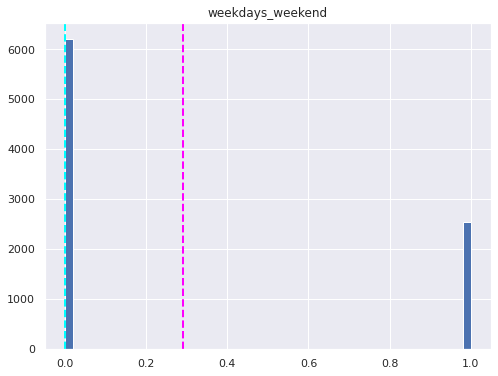

In [200]:
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

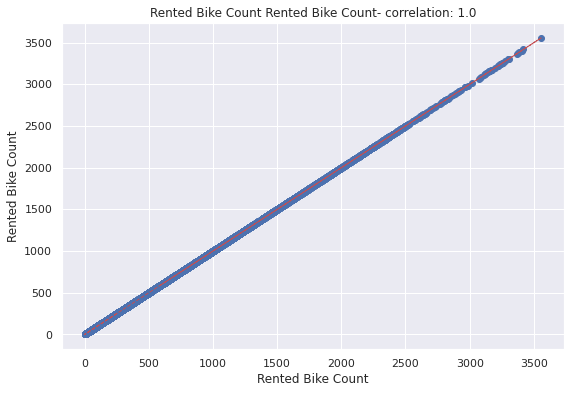

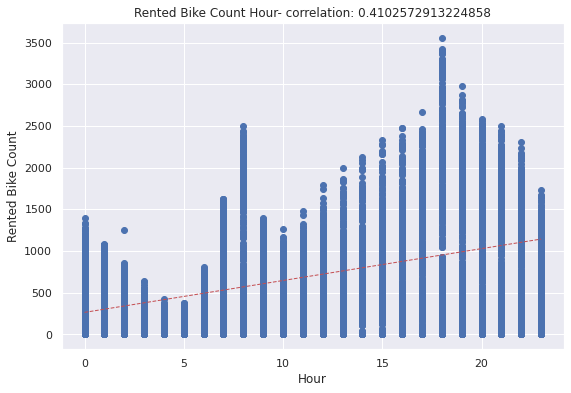

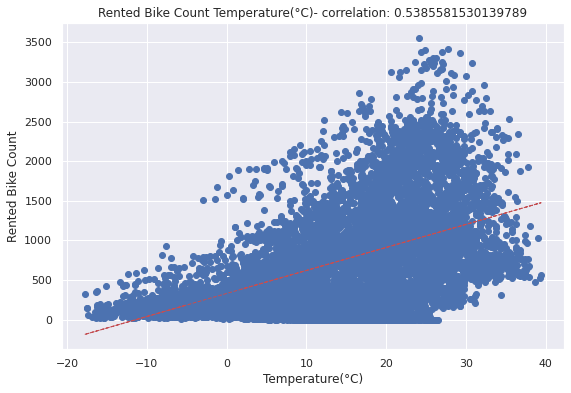

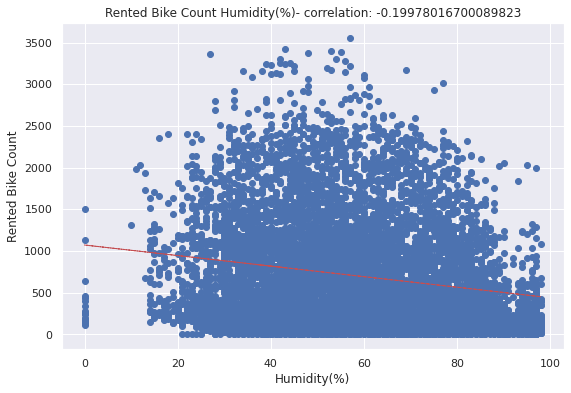

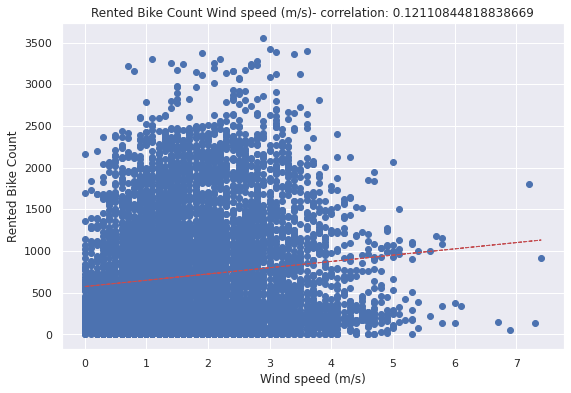

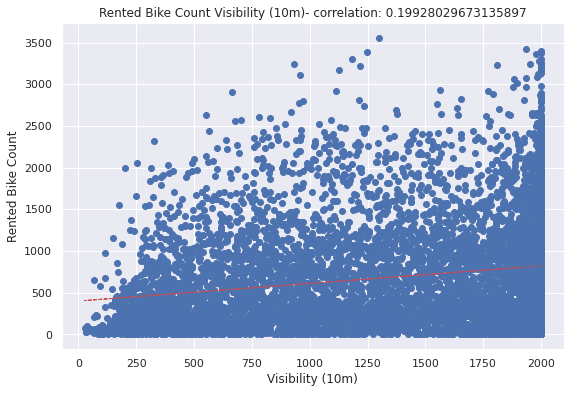

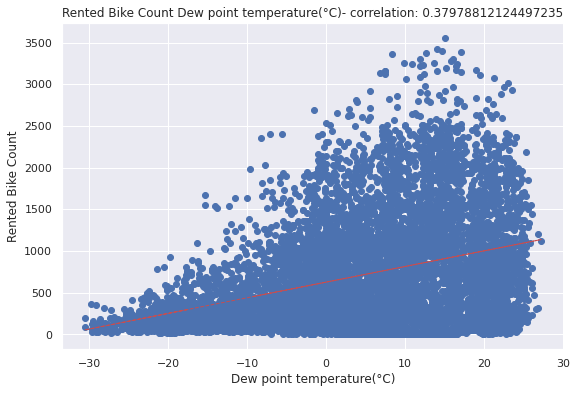

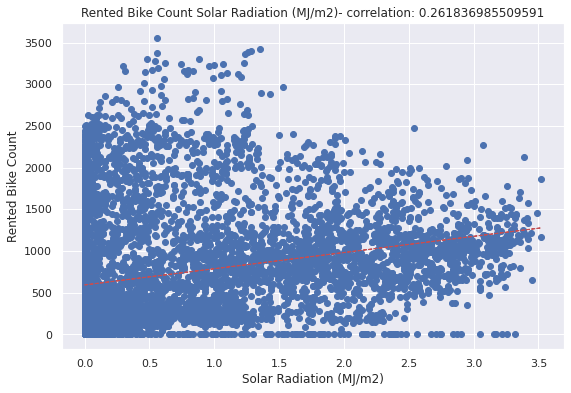

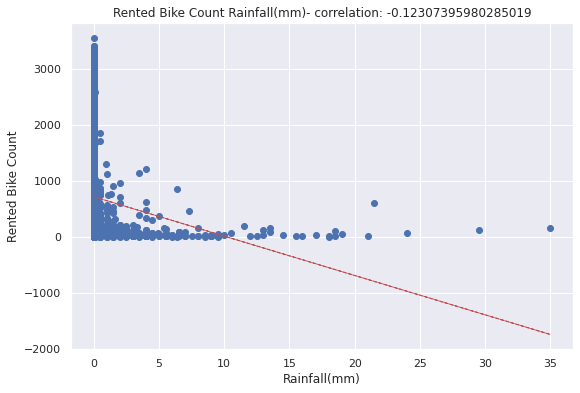

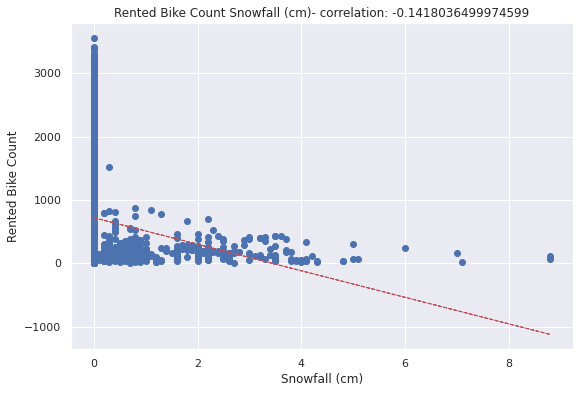

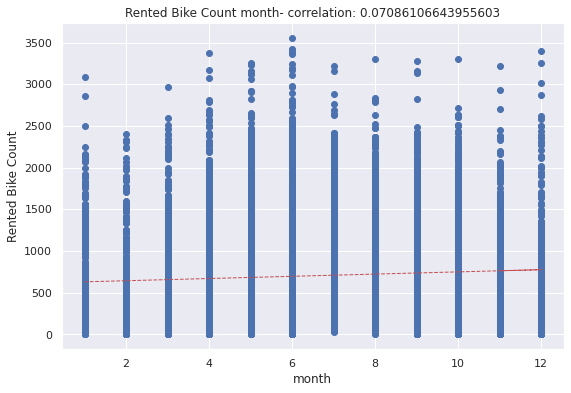

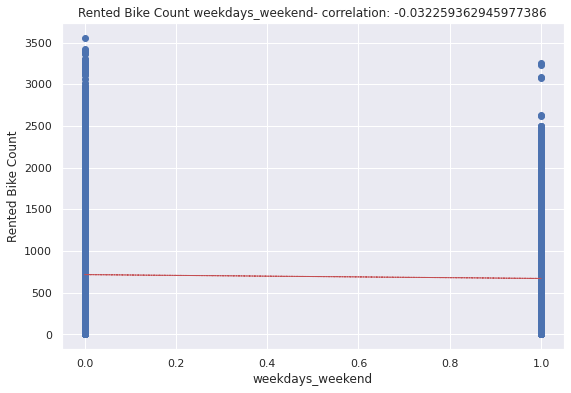

In [201]:
for col in numeric_features:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Rented Bike Count']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Rented Bike Count')
   ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Rented Bike Count'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

In [202]:
# sns.pairplot(df)

In [203]:
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [204]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [205]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Seasons          8760 non-null   object
 1   Holiday          8760 non-null   object
 2   Functioning Day  8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


In [206]:
# categorical_features = pd.get_dummies(categorical_features,drop_first=True))
categorical_feature = pd.get_dummies(categorical_features,drop_first=True)

In [207]:
categorical_feature

Seasons_Spring  Seasons_Summer  ...  Holiday_No Holiday  Functioning Day_Yes
0                  0               0  ...                   1                    1
1                  0               0  ...                   1                    1
2                  0               0  ...                   1                    1
3                  0               0  ...                   1                    1
4                  0               0  ...                   1                    1
...              ...             ...  ...                 ...                  ...
8755               0               0  ...                   1                    1
8756               0               0  ...                   1                    1
8757               0               0  ...                   1                    1
8758               0               0  ...                   1                    1
8759               0               0  ...                   1                    1

[8760 rows x 5 columns]

In [208]:
df= pd.concat([categorical_feature,numeric_features],axis=1)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Spring             8760 non-null   uint8  
 1   Seasons_Summer             8760 non-null   uint8  
 2   Seasons_Winter             8760 non-null   uint8  
 3   Holiday_No Holiday         8760 non-null   uint8  
 4   Functioning Day_Yes        8760 non-null   uint8  
 5   Rented Bike Count          8760 non-null   int64  
 6   Hour                       8760 non-null   int64  
 7   Temperature(°C)            8760 non-null   float64
 8   Humidity(%)                8760 non-null   int64  
 9   Wind speed (m/s)           8760 non-null   float64
 10  Visibility (10m)           8760 non-null   int64  
 11  Dew point temperature(°C)  8760 non-null   float64
 12  Solar Radiation (MJ/m2)    8760 non-null   float64
 13  Rainfall(mm)               8760 non-null   float

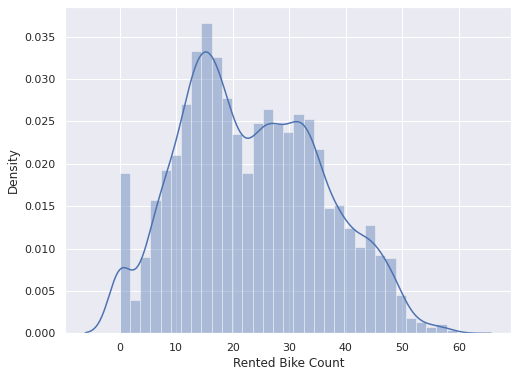

In [210]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

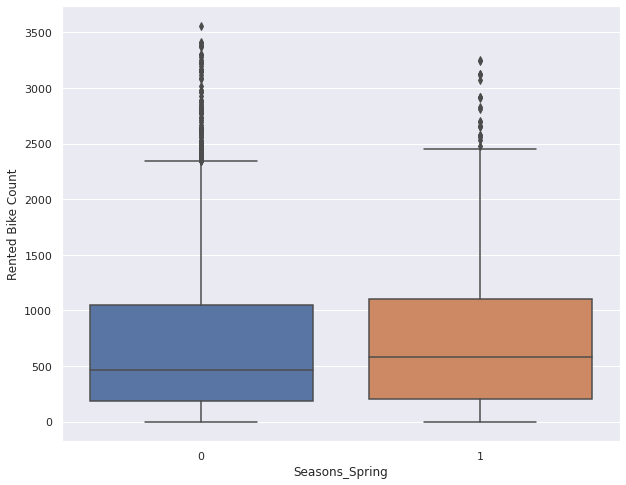

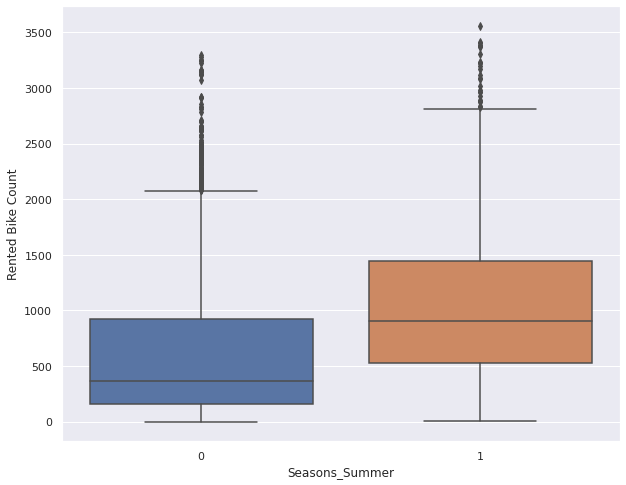

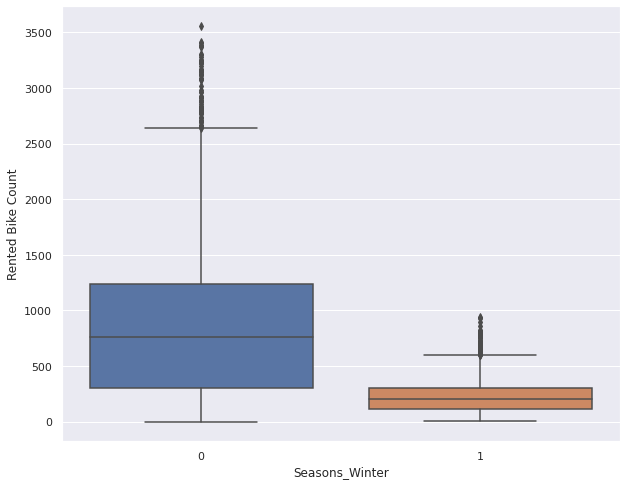

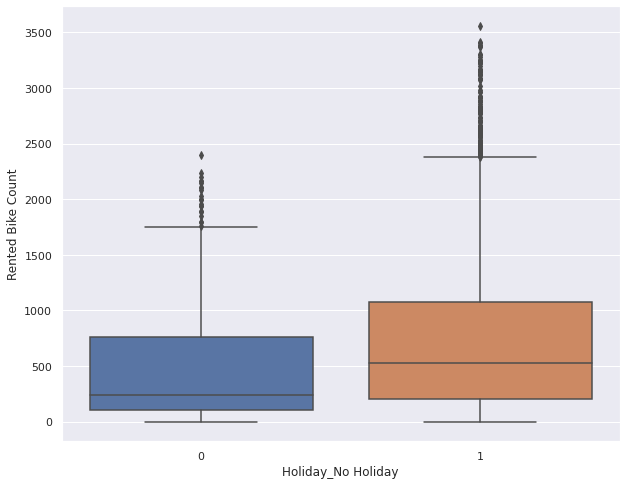

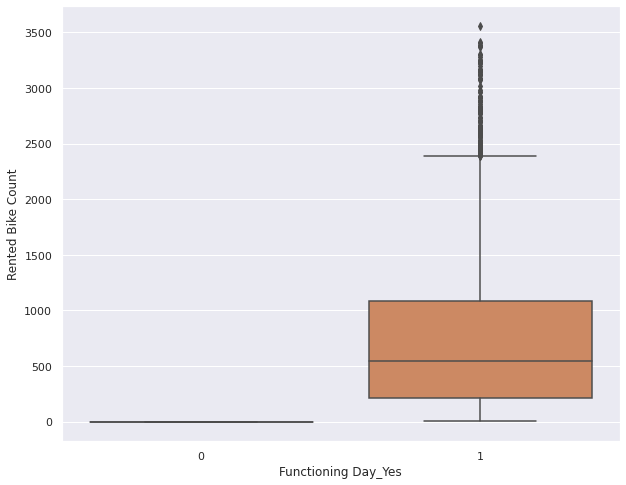

In [211]:
for col in categorical_feature.columns:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

looks like there is no bike rented on non functional days

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Spring             8760 non-null   uint8  
 1   Seasons_Summer             8760 non-null   uint8  
 2   Seasons_Winter             8760 non-null   uint8  
 3   Holiday_No Holiday         8760 non-null   uint8  
 4   Functioning Day_Yes        8760 non-null   uint8  
 5   Rented Bike Count          8760 non-null   int64  
 6   Hour                       8760 non-null   int64  
 7   Temperature(°C)            8760 non-null   float64
 8   Humidity(%)                8760 non-null   int64  
 9   Wind speed (m/s)           8760 non-null   float64
 10  Visibility (10m)           8760 non-null   int64  
 11  Dew point temperature(°C)  8760 non-null   float64
 12  Solar Radiation (MJ/m2)    8760 non-null   float64
 13  Rainfall(mm)               8760 non-null   float

---
#linear reg
---

In [213]:
df[[i for i in df.columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Functioning Day_No','Functioning Day_Yes']]]

Seasons_Spring  Seasons_Summer  ...  month  weekdays_weekend
0                  0               0  ...      1                 0
1                  0               0  ...      1                 0
2                  0               0  ...      1                 0
3                  0               0  ...      1                 0
4                  0               0  ...      1                 0
...              ...             ...  ...    ...               ...
8755               0               0  ...     11                 0
8756               0               0  ...     11                 0
8757               0               0  ...     11                 0
8758               0               0  ...     11                 0
8759               0               0  ...     11                 0

[8760 rows x 14 columns]

In [214]:
# creating X and Y df 
X=df[[i for i in df.columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]]
Y=np.sqrt(df['Rented Bike Count'])

In [215]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [216]:
#transforming the data set to std normal distribution
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [217]:
# importing the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [218]:
# training and evaluating the model
score_metrix (regressor,X_test,X_train,Y_test,Y_train,graph=False)

MSE : 173680.50589810018
RMSE : 416.74993209129644
R2 : 0.577556643905986
Adjusted R2 :  0.5746419013386401 



##lasso reg

In [219]:
# importing the Lasso Regression model
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

In [220]:
# training and evaluating the model
score_metrix (lasso,X_test,X_train,Y_test,Y_train,graph=False)

MSE : 173683.71031884907
RMSE : 416.7537766101815
R2 : 0.577548849788572
Adjusted R2 :  0.5746340534439669 



In [221]:
#finding the coefficient of lasso Regression model
lasso.coef_

array([-1.13989449e+00, -1.20777664e+00, -3.42136219e+00,  6.16374049e-01,
        5.01695993e+00,  3.39526521e+00,  5.71548882e+00, -3.43165319e+00,
        3.31625978e-02, -5.54816349e-03, -7.51685880e-01, -1.69206740e+00,
        6.40615459e-02,  3.24787522e-01, -3.19999879e-01])

In [222]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
#setting the parameters of the 
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)


In [223]:
# training and evaluating the model
score_metrix (lasso_grid,X_test,X_train,Y_test,Y_train,graph=False)

The best parameters found out to be : {'alpha': 0.01}  
where negative mean squared error is:  -54.763784758930754 

MSE : 174034.67172641933
RMSE : 417.1746297732154
R2 : 0.5766952058283198
Adjusted R2 :  0.5737745195759854 



##Ridge reg

In [224]:
# importing the Lasso regression model
from sklearn.linear_model import Ridge
ridge = Ridge()
# finding the best parameters for ridge by gridsearchcv
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

In [225]:
# training and evaluating the ridge_regressor
score_metrix (ridge_regressor,X_test,X_train,Y_test,Y_train,graph=False)

The best parameters found out to be : {'alpha': 20}  
where negative mean squared error is:  -54.773518271824074 

MSE : 173959.54612762743
RMSE : 417.0845791055184
R2 : 0.5768779339354158
Adjusted R2 :  0.5739585084565892 



## Elastic Net

In [226]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [227]:
# training and evaluating the elasticnet
score_metrix (elasticnet,X_test,X_train,Y_test,Y_train,graph=False)

MSE : 180705.37982454407
RMSE : 425.0945539812808
R2 : 0.5604700324738119
Adjusted R2 :  0.5574373970033 



In [228]:
elasticnet = ElasticNet()
# finding the best parameters for elasticnet by gridsearchcv
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elasticnet_grid = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)

The best parameters found out to be : {'alpha': 0.01, 'l1_ratio': 0.5}  
where negative mean squared error is:  -52.47173644563817 

MSE : 173836.05755556189
RMSE : 416.9365150182482
R2 : 0.583698957259654
Adjusted R2 :  0.5827461779430374 



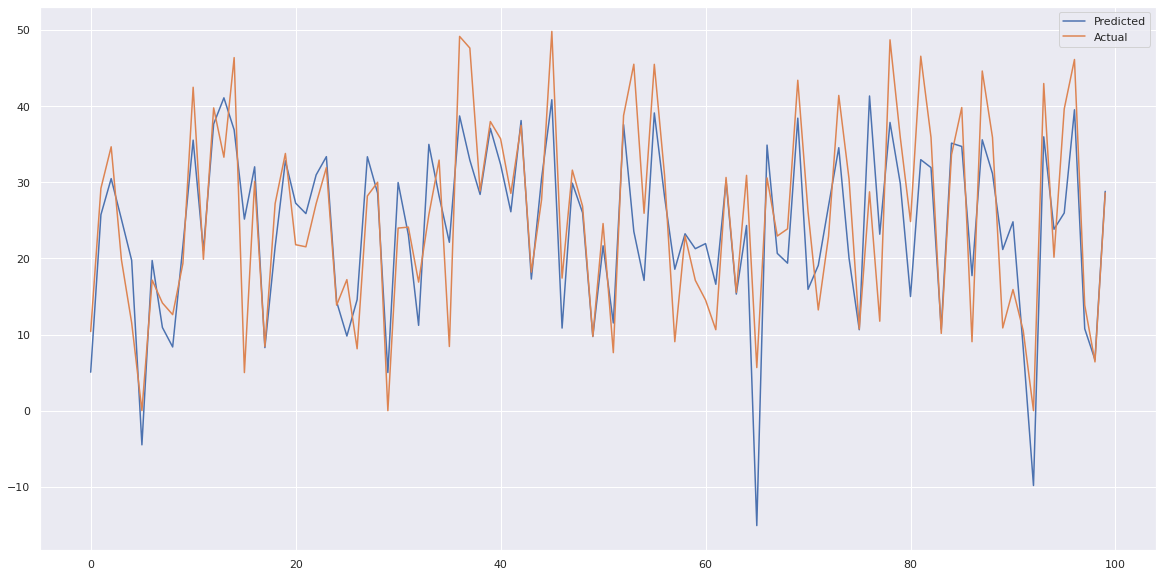

In [229]:
# training and evaluating the elasticnet_grid
score_metrix(elasticnet_grid,X_train, X_test, Y_train, Y_test)

---
# Polynominal reg
---

In [270]:
# Data for all the independent variables
X = df.drop(columns=['Rented Bike Count'],axis=1)

# Data for the dependent variable
Y = df['Rented Bike Count']

In [271]:
#spliting the date set in train and test by 75 and 25 percent
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [232]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

MSE : 155469.27803904624
RMSE : 394.295926987645
R2 : 0.6276835573019302
Adjusted R2 :  0.6267744983849197 



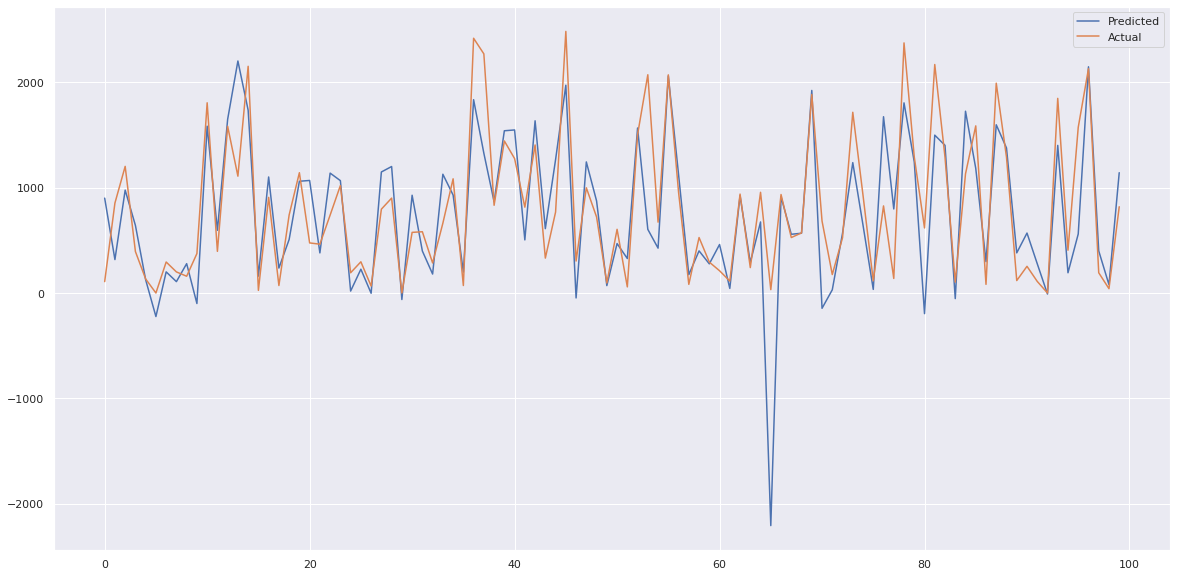

In [233]:
#creating Polynomial Features model
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
# training and evaluating the PolynomialFeatures
train_and_score(pipe,X_train, X_test, Y_train, Y_test)

---
# KNN
---

In [234]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

The best parameters found out to be : {'n_neighbors': 9}
 
where negative mean squared error is:  0.41352909735876536 

MSE : 226782.05366518217
RMSE : 476.2163937383741
R2 : 0.4569043572249847
Adjusted R2 :  0.4555783187259156 



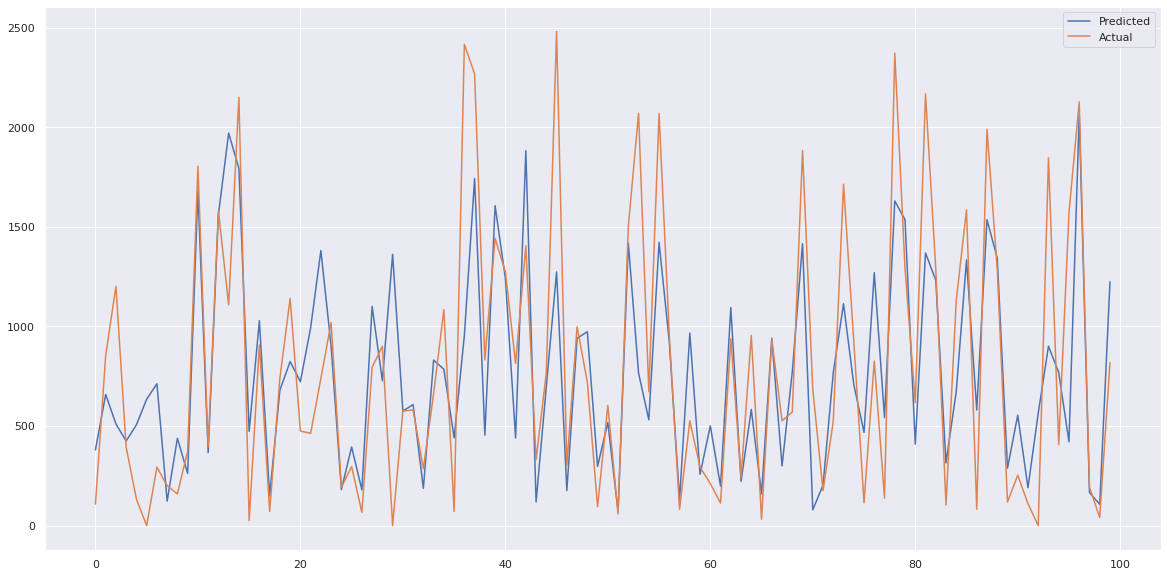

In [235]:
# creating KNN model
knn_model = KNeighborsRegressor()

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
train_and_score(knn_grid,X_train, X_test, Y_train, Y_test)

---
# Desision Tree
---

MSE : 114100.94901065448
RMSE : 337.78831982567795
R2 : 0.7267520633018478
Adjusted R2 :  0.726084893000128 



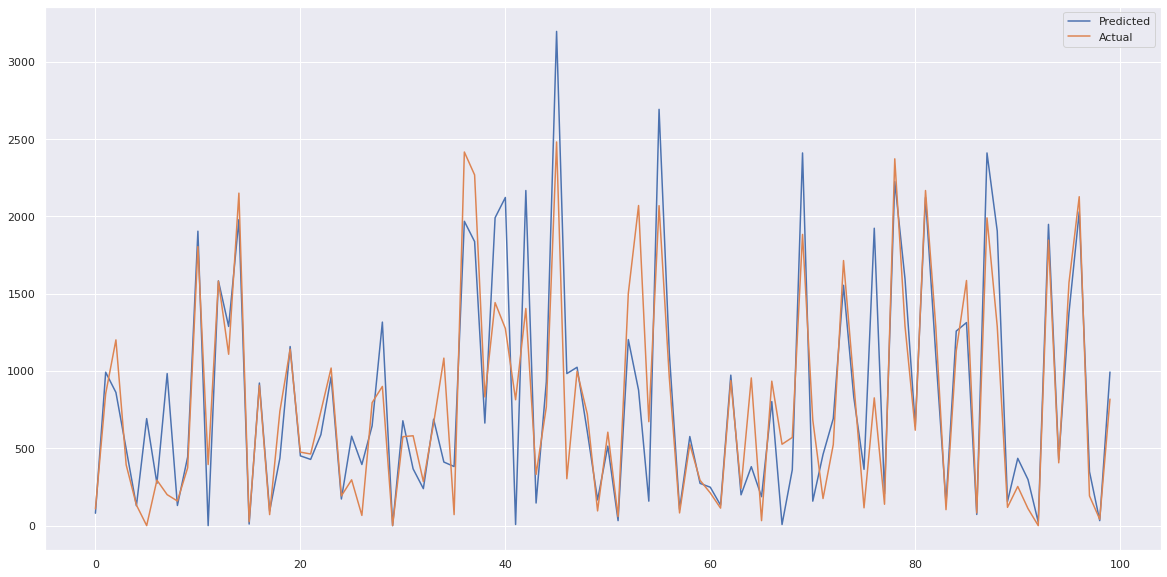

In [236]:
from sklearn.tree import DecisionTreeRegressor
# creating DecisionTree model
DecisionTree = DecisionTreeRegressor()

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_train, X_test, Y_train, Y_test)

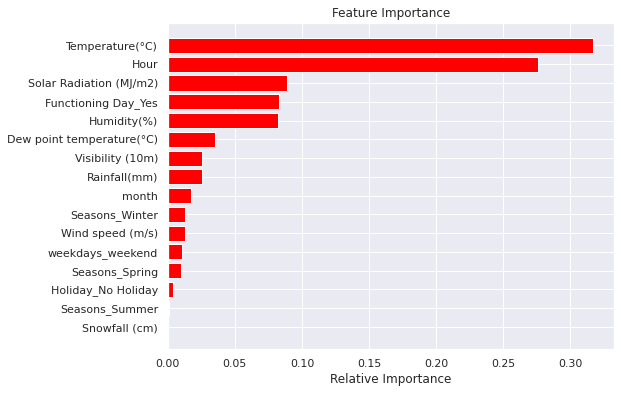

In [237]:
# Plot the feature importance 
feature_importances_graph(DecisionTree)

---
# random forest
---

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Spring             8760 non-null   uint8  
 1   Seasons_Summer             8760 non-null   uint8  
 2   Seasons_Winter             8760 non-null   uint8  
 3   Holiday_No Holiday         8760 non-null   uint8  
 4   Functioning Day_Yes        8760 non-null   uint8  
 5   Rented Bike Count          8760 non-null   int64  
 6   Hour                       8760 non-null   int64  
 7   Temperature(°C)            8760 non-null   float64
 8   Humidity(%)                8760 non-null   int64  
 9   Wind speed (m/s)           8760 non-null   float64
 10  Visibility (10m)           8760 non-null   int64  
 11  Dew point temperature(°C)  8760 non-null   float64
 12  Solar Radiation (MJ/m2)    8760 non-null   float64
 13  Rainfall(mm)               8760 non-null   float

In [239]:
from sklearn.ensemble import RandomForestRegressor

In [240]:
# creating Random Forest Regressor model
rfr=RandomForestRegressor(max_leaf_nodes=60)

MSE : 69433.16853749997
RMSE : 263.5017429496434
R2 : 0.8337220662422771
Adjusted R2 :  0.8333160770861465 



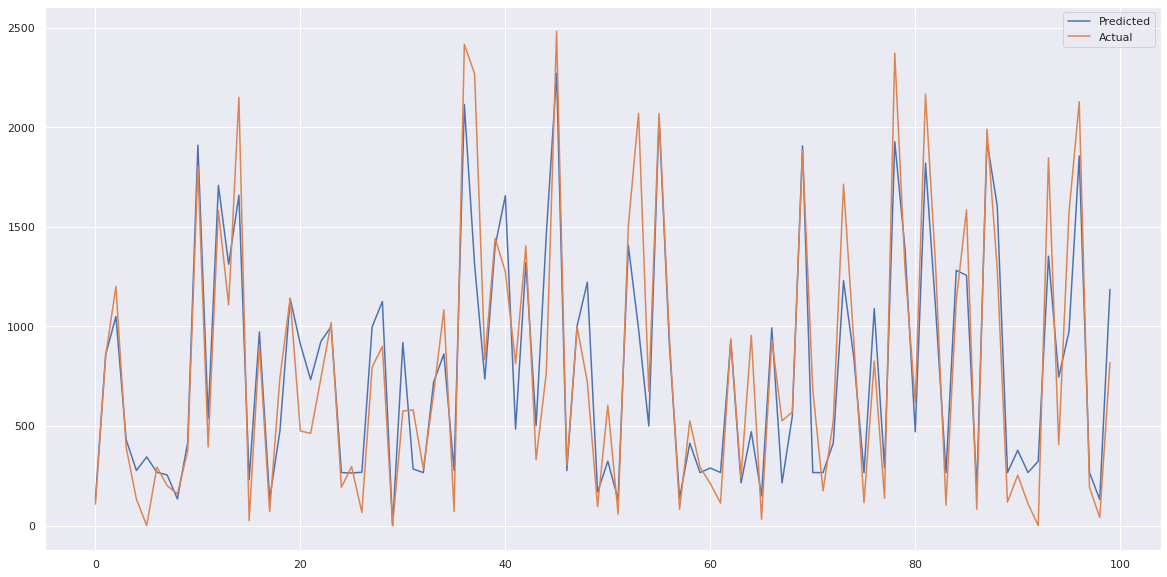

In [241]:
# training and evaluating the Random Forest Regressor
train_and_score(rfr,X_train, X_test, Y_train, Y_test,best_parameter=True)

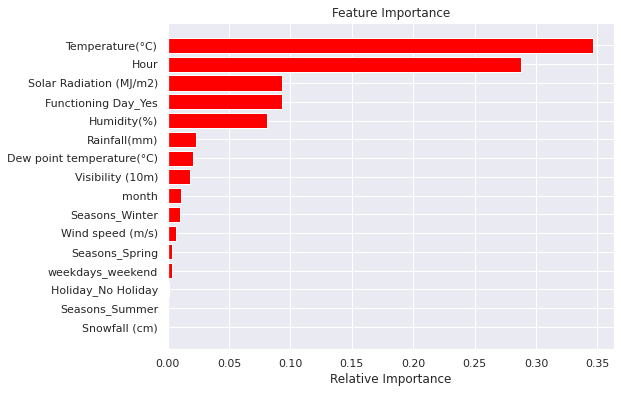

In [242]:
# Plot the feature importance 
feature_importances_graph(rfr)

In [243]:
LimeTabularExplainer_table(rfr,instance=2,num_features=5,dependent_var='Rented Bike Count')

## implimenting grid search random forest
---

In [244]:
# creating RandomForestRegressor model
rfc=RandomForestRegressor()

In [245]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [80, 100,120],'max_depth': [15,17,19],'max_leaf_nodes':[40,60,80]}
rfr_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='neg_mean_squared_error',cv=5,verbose=0,n_jobs=-1)

The best parameters found out to be : {'max_depth': 15, 'max_leaf_nodes': 80, 'n_estimators': 100}
 
where negative mean squared error is:  -74792.245222585 

MSE : 65773.55061612917
RMSE : 256.4635463689317
R2 : 0.8424860866539283
Adjusted R2 :  0.8421014959910965 



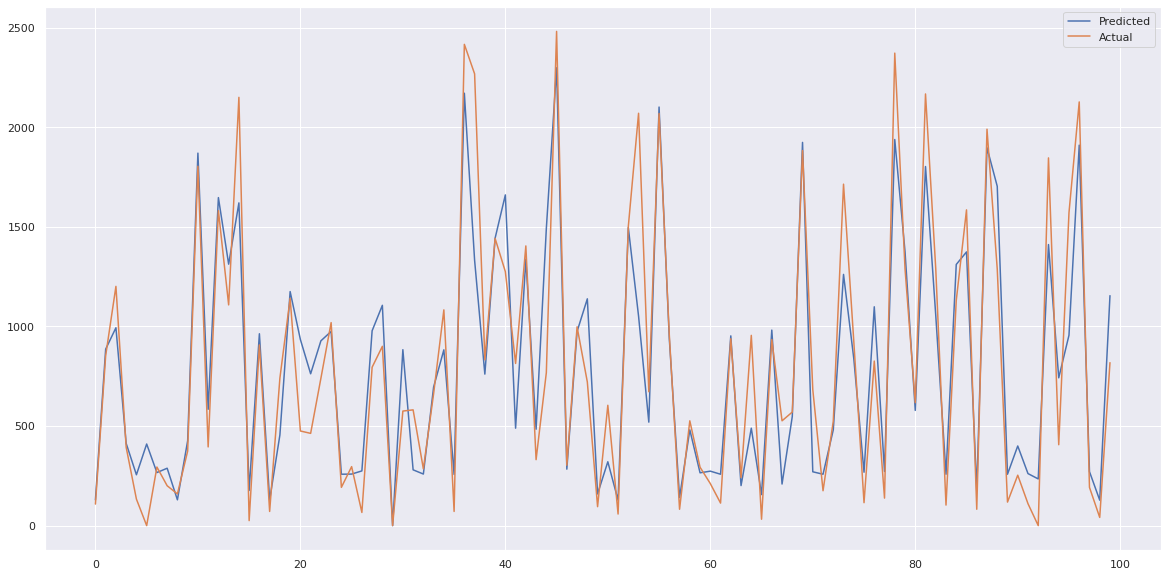

In [246]:
# training and evaluating the Random Forest Regressor
train_and_score(rfr_grid,X_train, X_test, Y_train, Y_test)

In [247]:
# LimeTabularExplainer_table(rfr_grid,instance=2,num_features=5,dependent_var='Rented Bike Count')

## implimenting Bayes SearchCV random forest
---

In [248]:
pip install scikit-optimize

In [249]:
grid_values_bs = {'n_estimators': [80, 100,120],'max_depth': [15,17,19],'max_leaf_nodes':[40,60,80]}


In [250]:
# finding the best parameters for knn_model by BayesSearchCV
from skopt import BayesSearchCV
rfr_bs_cv = BayesSearchCV(RandomForestRegressor(),
                    grid_values_bs,
                    cv=5)

The best parameters found out to be : OrderedDict([('max_depth', 17), ('max_leaf_nodes', 80), ('n_estimators', 100)])
 
where negative mean squared error is:  0.8184411791024769 

MSE : 66241.66544232749
RMSE : 257.3745625393611
R2 : 0.8413650494363978
Adjusted R2 :  0.8409777216157023 



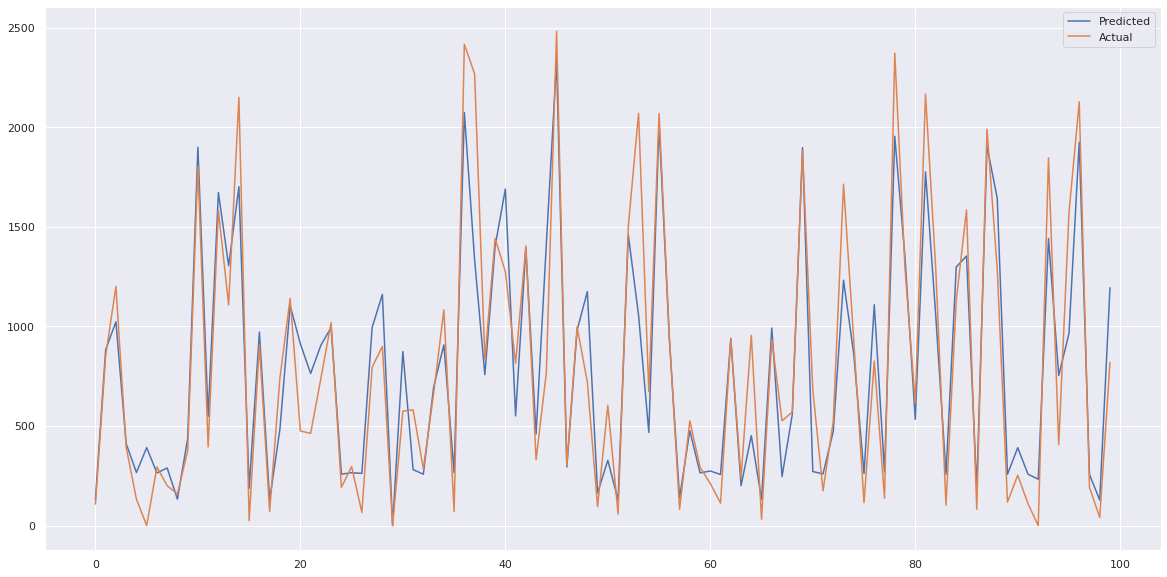

In [251]:
train_and_score(rfr_bs_cv,X_train, X_test, Y_train, Y_test)

In [252]:
LimeTabularExplainer_table(rfr_bs_cv,instance=2,num_features=5,dependent_var='Rented Bike Count')

---
# Gbm
---

In [253]:
from sklearn.ensemble import GradientBoostingRegressor

In [254]:
# creating GradientBoostingRegressor model
gbm=GradientBoostingRegressor()

In [258]:
# finding the best parameters for knn_model by gridsearchcv
param_test1 = {'n_estimators': [80,100,150],'max_depth': [10,15,20,30]}
gbm_gs = GridSearchCV(estimator=gbm,param_grid= param_test1)

The best parameters found out to be : {'max_depth': 10, 'n_estimators': 150}
 
where negative mean squared error is:  0.8233307444623869 

MSE : 58824.42771436341
RMSE : 242.537476927512
R2 : 0.8591277843017898
Adjusted R2 :  0.8587838265036559 



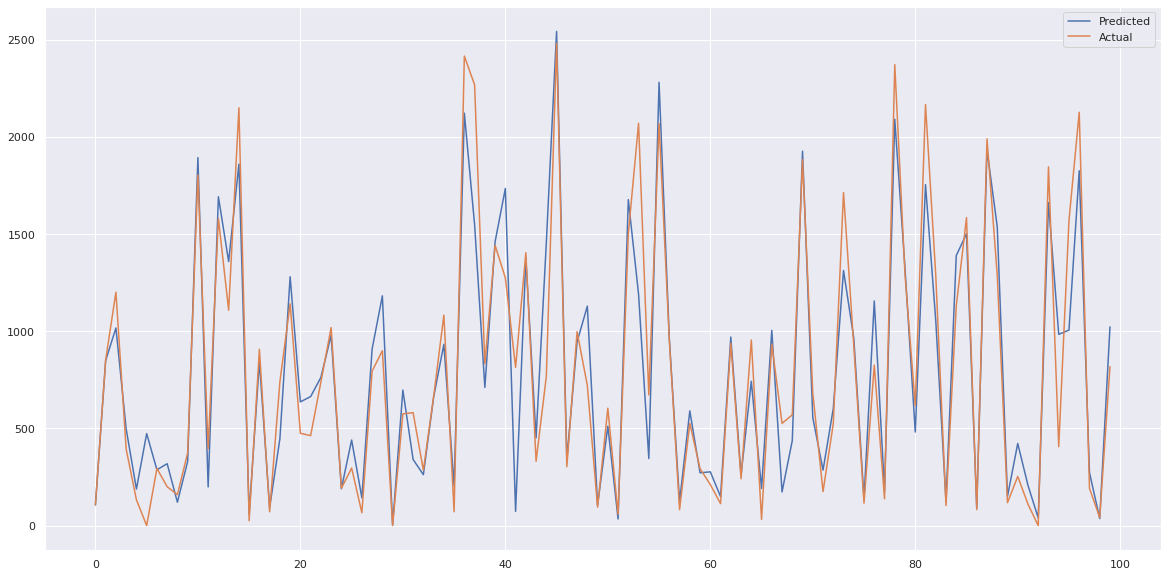

In [260]:
# training and evaluating the PolynomialFeatures
train_and_score(gbm_gs,X_train, X_test, Y_train, Y_test)

---
#XGboost
---

learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

max_depth: determines how deeply each tree is allowed to grow during any boosting round.

subsample: percentage of samples used per tree. Low value can lead to underfitting.

colsample_bytree: percentage of features used per tree. High value can lead to overfitting.

n_estimators: number of trees you want to build.

objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

alpha: L1 regularization on leaf weights. A large value leads to more regularization.

lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [261]:
from xgboost import XGBRegressor

In [262]:
# creating XGBRegressor model
xgbr=XGBRegressor()

## implimenting grid search xgb
---

In [265]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbr_param={'n_estimators': [50,100,150],'max_depth': [15,20,25]}
xgbr_grid=GridSearchCV(estimator=xgbr,param_grid=xgbr_param,cv=5,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1)

[16:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The best parameters found out to be : {'max_depth': 15, 'n_estimators': 150}
 
where negative mean squared error is:  -65326.67650049956 

MSE : 56525.018897121285
RMSE : 237.74990830097346
R2 : 0.8646343880626252
Adjusted R2 :  0.8643038753522638 



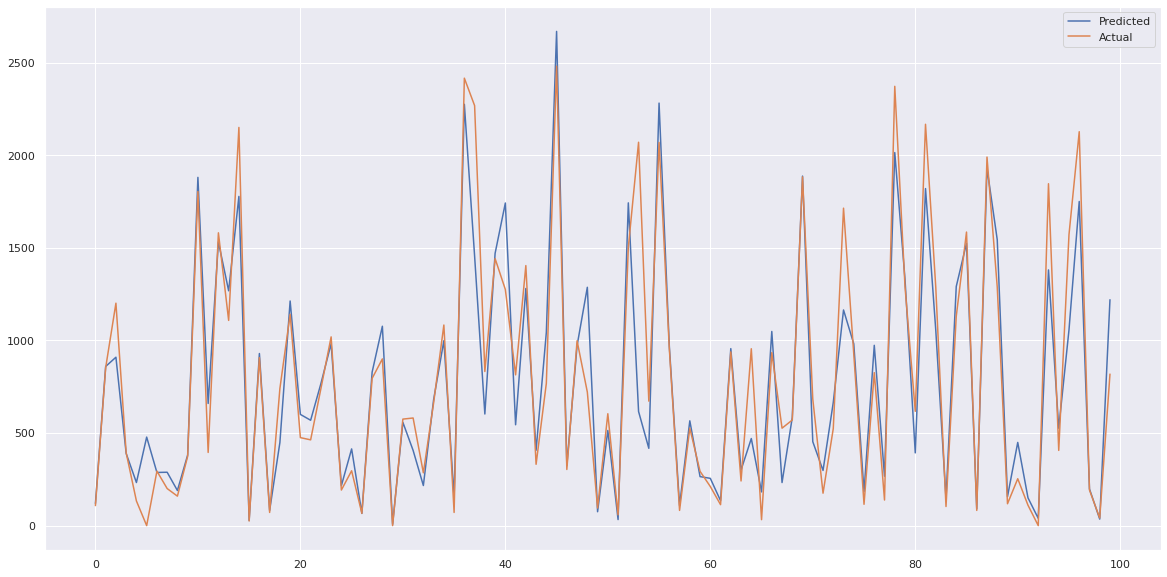

In [266]:
# training and evaluating the xgb_grid
train_and_score(xgbr_grid,X_train, X_test, Y_train, Y_test)

In [267]:
xgbr_bs_cv

BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     importance_type='gain', learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='reg:linear', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
              fit_params=None, iid=True, n_iter=50, n_jobs=-1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
    

In [268]:
xgbr_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## implimenting Bayes SearchCV xgb
---

In [272]:
X_train.shape

(6570, 16)

In [273]:
xgbr_param_bs={'n_estimators': [50,100,150],'max_depth': [15,20,25]}

In [274]:
# finding the best parameters for knn_model by BayesSearchCV
from skopt import BayesSearchCV
xgbr_bs_cv = BayesSearchCV(xgbr,
                            xgbr_param_bs,
                            cv=5,
                            scoring='neg_mean_squared_error',
                            verbose=0,n_jobs=-1)

[16:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The best parameters found out to be : OrderedDict([('max_depth', 20), ('n_estimators', 150)])
 
where negative mean squared error is:  -65781.52568329565 

MSE : 55911.41769663311
RMSE : 236.45595297355723
R2 : 0.8661038347538463
Adjusted R2 :  0.8657769098882979 



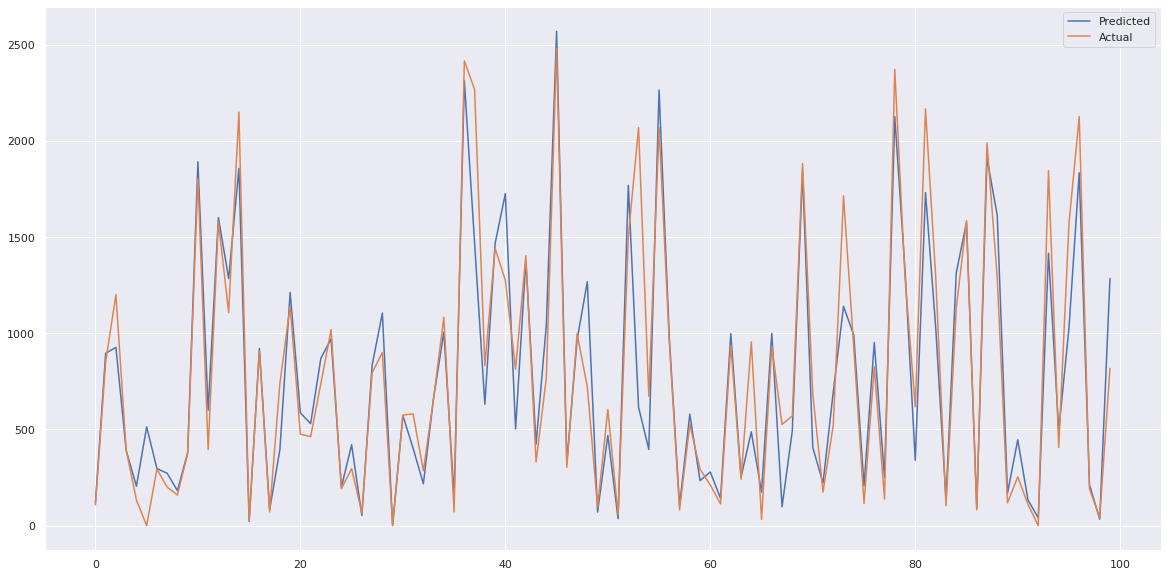

In [275]:
# training and evaluating the xgbr_bs_cv
train_and_score(xgbr_bs_cv,X_train, X_test, Y_train, Y_test)

# CatBoost

In [276]:
!pip install catboost

In [277]:
from catboost import CatBoostRegressor

In [278]:
cb_model=CatBoostRegressor(verbose=0)

 
where negative mean squared error is:  {'learn': {'RMSE': 112.1643919031376}} 

MSE : 44037.45920025699
RMSE : 209.85104050315545
R2 : 0.8945394848313167
Adjusted R2 :  0.8942819892960354 



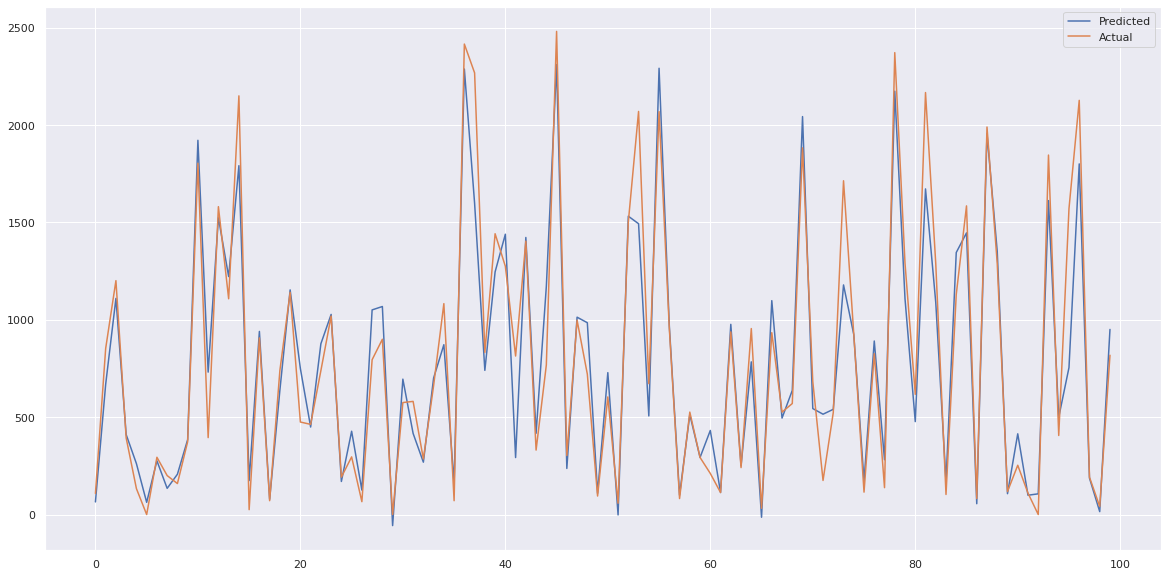

In [279]:
# training and evaluating the PolynomialFeatures
train_and_score(cb_model,X_train, X_test, Y_train, Y_test)

In [280]:
LimeTabularExplainer_table(cb_model,instance=2,num_features=5,dependent_var='Rented Bike Count')

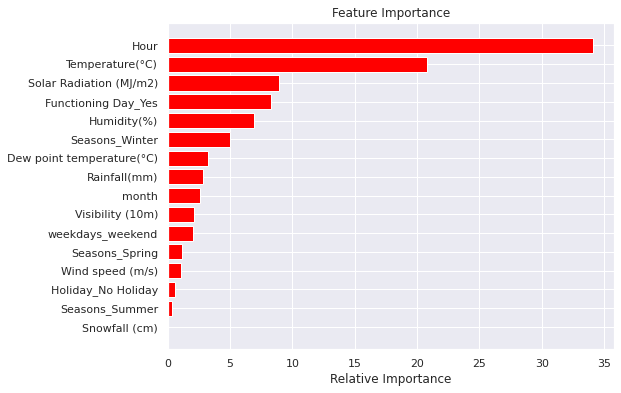

In [281]:
# Plot the feature importance 
feature_importances_graph(cb_model)

# SHAP

In [282]:
pip install shap

In [283]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [284]:
for_instance=2

In [285]:
# shape for xgboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgbr_bs_cv.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [286]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

#ELI5

In [287]:
pip install eli5

In [288]:
import eli5 as eli


In [289]:
feature_names=list(X_test.columns)

In [290]:
for_instance=2

In [291]:
#eli5 for xgboost model 
eli.show_prediction(xgbr_bs_cv.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

The green color shows how much the feature contributes to the prediction of the respective class and the weights are positive for the green color.

The red color has negative weights that indicate the feature isn't contributing to the prediction of that class.

As can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output.

# score matrix for all the models 

In [292]:
dict={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [299]:
model_name=['Linear','Lasso','Lasso_grid','Ridge_grid','Elasticnet','Elasticnet_grid','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Random_Forest_grid','Random_Forest_bayesian','a','Gradient_Boosting_grid','b','Xtreme_GB','Xtreme_bayesian','CATBoost']

In [300]:
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [301]:
matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

Models  Mean_square_error  ...        R2  Adjusted_R2
0                   Linear      173680.505898  ...  0.577557     0.574642
1                    Lasso      173683.710319  ...  0.577549     0.574634
2               Lasso_grid      174034.671726  ...  0.576695     0.573775
3               Ridge_grid      173959.546128  ...  0.576878     0.573959
4               Elasticnet      180705.379825  ...  0.560470     0.557437
5          Elasticnet_grid      173836.057556  ...  0.583699     0.582746
6               Polynomial      155469.278039  ...  0.627684     0.626774
7      K-Nearyest_Neighbor      226782.053665  ...  0.456904     0.455578
8            Decision_Tree      114100.949011  ...  0.726752     0.726085
9            Random_Forest       69433.168537  ...  0.833722     0.833316
10      Random_Forest_grid       65773.550616  ...  0.842486     0.842101
11  Random_Forest_bayesian       66241.665442  ...  0.841365     0.840978
12                       a       66142.602876  ...  0.841602     0.841216
13  Gradient_Boosting_grid       58824.427714  ...  0.859128     0.858784
14                       b       66424.472911  ...  0.840927     0.840539
15               Xtreme_GB       56525.018897  ...  0.864634     0.864304
16         Xtreme_bayesian       55911.417697  ...  0.866104     0.865777
17                CATBoost       44037.459200  ...  0.894539     0.894282

[18 rows x 5 columns]